# Import needed modules and useful functions

In [1]:
#-- useful python script for training the DeepTICA cvs --#
from utils import *

#-- to not visualize warnings --#
import warnings
warnings.filterwarnings('ignore')

# Simulation parameters 

In [2]:
kb=0.008314
#-- SIMULATION PARAMETERS --#
sim_parameters = {
    'temp':300, 
    'beta': 1./(300*kb),
    'kbt': None,
    #-- parameters to compute the fes --#
    'blocks':2,
    'bandwidth': 0.02,
    'plot_max_fes' :70,
}
#--------------------------------------#

# Prepare input files for plumed

In [3]:
folder = "unbias_A/bias1/bias2/"

Path(folder).mkdir(parents=True, exist_ok=True)

with open(folder+"plumed.dat","w") as file:
    print("""
# vim:ft=plumed

MOLINFO STRUCTURE=input.ala2.pdb
phi: TORSION ATOMS=@phi-2
psi: TORSION ATOMS=@psi-2
omega: TORSION ATOMS=5,6,7,9
theta: TORSION ATOMS=9,15,17,18
ene: ENERGY

# include descriptors
INCLUDE FILE=plumed_descriptors.data
# define cv
tica_cv1: CUSTOM ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45 VAR=x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44 FUNC=0.228168*(x0-0.151427)-0.122671*(x1-0.237442)-0.091310*(x2-0.241539)+0.001116*(x3-0.379944)+0.011797*(x4-0.468651)-0.198771*(x5-0.462624)+0.144205*(x6-0.538464)+0.031061*(x7-0.487857)-0.019642*(x8-0.602171)+0.153111*(x9-0.122371)-0.080028*(x10-0.133431)+0.142774*(x11-0.247797)+0.089529*(x12-0.353738)+0.075940*(x13-0.340591)-0.185345*(x14-0.424966)+0.075838*(x15-0.377133)+0.066841*(x16-0.504253)+0.092765*(x17-0.225254)-0.072986*(x18-0.285225)-0.005001*(x19-0.398486)-0.278964*(x20-0.367365)+0.148818*(x21-0.452550)+0.155473*(x22-0.393146)-0.067458*(x23-0.514137)-0.000116*(x24-0.147052)-0.120274*(x25-0.243819)+0.256530*(x26-0.251190)+0.006640*(x27-0.333297)-0.254147*(x28-0.311807)-0.041429*(x29-0.446540)+0.055126*(x30-0.153933)-0.009220*(x31-0.154681)-0.021990*(x32-0.241343)-0.010474*(x33-0.247009)+0.143809*(x34-0.385280)-0.275912*(x35-0.255912)+0.103539*(x36-0.307999)+0.195480*(x37-0.349798)-0.035764*(x38-0.478359)-0.323696*(x39-0.122942)-0.370475*(x40-0.134751)+0.005519*(x41-0.248201)+0.264179*(x42-0.225130)-0.034204*(x43-0.283161)-0.033764*(x44-0.146419) PERIODIC=NO
tica_cv2: CUSTOM ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45 VAR=x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44 FUNC=0.081016*(x0-0.151427)-0.039906*(x1-0.237442)-0.002675*(x2-0.241539)+0.019174*(x3-0.379944)+0.024238*(x4-0.468651)-0.142829*(x5-0.462624)+0.043116*(x6-0.538464)-0.153248*(x7-0.487857)+0.183462*(x8-0.602171)-0.023180*(x9-0.122371)-0.103179*(x10-0.133431)+0.292758*(x11-0.247797)-0.071601*(x12-0.353738)-0.221501*(x13-0.340591)-0.003851*(x14-0.424966)+0.439347*(x15-0.377133)-0.306380*(x16-0.504253)+0.107968*(x17-0.225254)-0.199210*(x18-0.285225)+0.025598*(x19-0.398486)+0.295394*(x20-0.367365)-0.068040*(x21-0.452550)-0.247036*(x22-0.393146)+0.094599*(x23-0.514137)-0.154445*(x24-0.147052)+0.027155*(x25-0.243819)+0.256333*(x26-0.251190)-0.036340*(x27-0.333297)-0.108503*(x28-0.311807)-0.025985*(x29-0.446540)-0.010937*(x30-0.153933)-0.181144*(x31-0.154681)+0.050813*(x32-0.241343)-0.010654*(x33-0.247009)+0.141373*(x34-0.385280)+0.084334*(x35-0.255912)-0.044195*(x36-0.307999)-0.058717*(x37-0.349798)+0.012726*(x38-0.478359)+0.136354*(x39-0.122942)+0.185183*(x40-0.134751)-0.125916*(x41-0.248201)-0.129257*(x42-0.225130)+0.041602*(x43-0.283161)+0.009848*(x44-0.146419) PERIODIC=NO
# bias 
opes: OPES_METAD ARG=tica_cv1,tica_cv2 TEMP=300 PACE=500 FILE=KERNELS BARRIER=40 STATE_WFILE=RestartKernels STATE_WSTRIDE=500*10
 
PRINT FMT=%g STRIDE=500 FILE=COLVAR ARG=*

ENDPLUMED
""",file=file)

#-- run gromacs --#
#execute("cp script/input.* script/plumed_descriptors.data script/run_gromacs.sh "+folder,folder=".")
#execute("./run_gromacs.sh",folder=folder)

In [4]:
data = load_dataframe(folder+"COLVAR")
olddata = load_dataframe("unbias_A/COLVAR")
descriptors_names = data.filter(regex='^d[^a-z]').columns.values
data_complete = load_dataframe("../../angles/COLVAR")
X_complete = data_complete[descriptors_names].to_numpy()

## Adding the unbias data to the bias one
In order to use also the old data to obtain an estime on the fly of TICA cv we need to concat both data together  
The time of the bias data must be increase by the last valued of the old_data last time

In [5]:
data["time"] = data["time"] + olddata["time"].tail(1).values
data["opes.bias"] = data["opes.bias"]-min(data["opes.bias"])
newdata = pd.concat([ olddata,data],ignore_index=True).replace(np.nan, 0)

In [6]:
newdata = load_dataframe(folder+"COLVAR")

Text(0, 0.5, '$\\psi$')

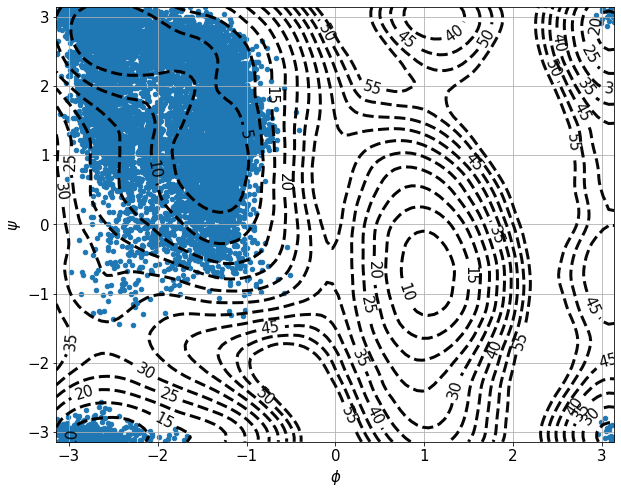

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
#load_dataframe(folder+"COLVAR").plot.scatter(y="psi",x="phi",ax=ax)
newdata.plot.scatter(y="psi",x="phi",ax=ax)

fes = np.loadtxt("../../angles/fes.txt",delimiter=" ")
grid0 = np.loadtxt("../../angles/grid0.txt",delimiter=" ")
grid1 = np.loadtxt("../../angles/grid1.txt",delimiter=" ")
bounds = np.arange(0, 60, 5.)
c = ax.contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
    norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
)
c.clabel()
ax.grid()
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$\psi$")

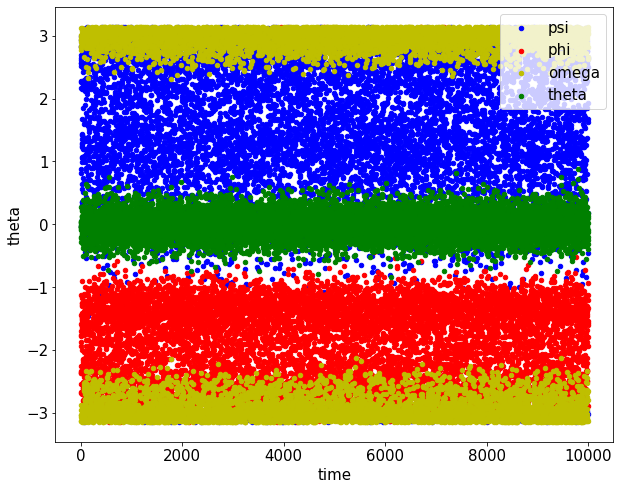

In [8]:
#data = load_dataframe(folder+"COLVAR")
fig,ax = plt.subplots(1,1,figsize=(10,8))
newdata.plot.scatter(x="time",y="psi",ax=ax, color="b", label="psi")
newdata.plot.scatter(x="time",y="phi",ax=ax, color="r", label="phi")
newdata.plot.scatter(x="time",y="omega",ax=ax, color="y", label="omega")
newdata.plot.scatter(x="time",y="theta",ax=ax, color="g", label="theta")
ax.legend()

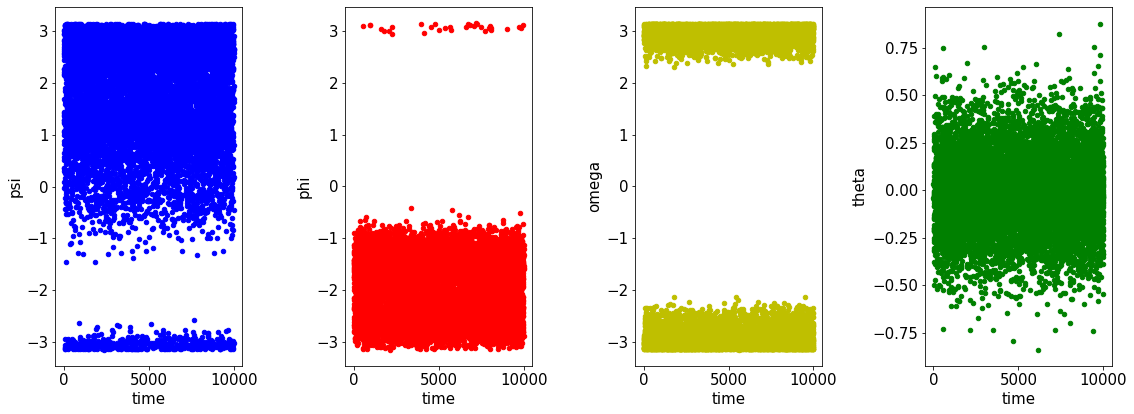

In [9]:
fig,axs = plt.subplots(1,4,figsize=(16,6))
newdata.plot.scatter(x="time",y="psi",ax=axs[0], color="b")
newdata.plot.scatter(x="time",y="phi",ax=axs[1], color="r")
newdata.plot.scatter(x="time",y="omega",ax=axs[2], color="y")
newdata.plot.scatter(x="time",y="theta",ax=axs[3], color="g")
plt.tight_layout()

<AxesSubplot:xlabel='psi', ylabel='omega'>

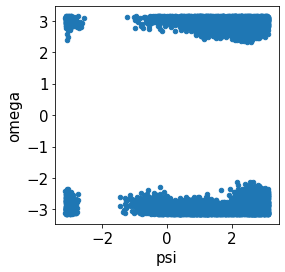

In [10]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
#load_dataframe(folder+"COLVAR").plot.scatter(y="omega",x="psi",ax=ax)
newdata.plot.scatter(y="omega",x="psi",ax=ax)

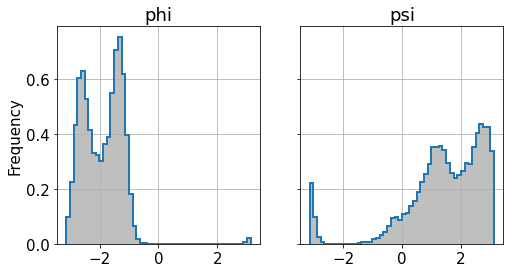

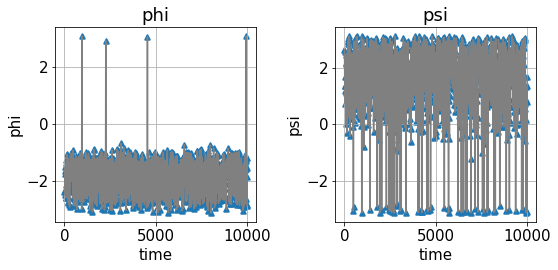

In [11]:
#data = load_dataframe(folder+"COLVAR")
descriptors_names = data.filter(regex='^p').columns.values

fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)

for ax,desc in zip(axs.flatten(),descriptors_names):
    newdata[desc].plot.hist(bins=50,alpha=1,ax=ax,legend=False,grid=True,histtype='step',linewidth=2,density=True)
    newdata[desc].plot.hist(bins=50,alpha=0.5,ax=ax,legend=False,grid=True,color="grey",density=True)
    ax.set_title(desc)

fig,axs = plt.subplots(1,2,figsize=(8,4))

for ax,desc in zip(axs.flatten(),descriptors_names):
    newdata[::10].plot.scatter(x="time",y=desc,alpha=1,ax=ax,legend=False,grid=True,linewidth=2,marker="^")
    newdata[::10].plot.line(x="time",y=desc,alpha=1,ax=ax,legend=False,grid=True,color="grey")
    ax.set_title(desc)

plt.tight_layout()

In [12]:
#gridspec_fes(s,logweight,sim_parameters)

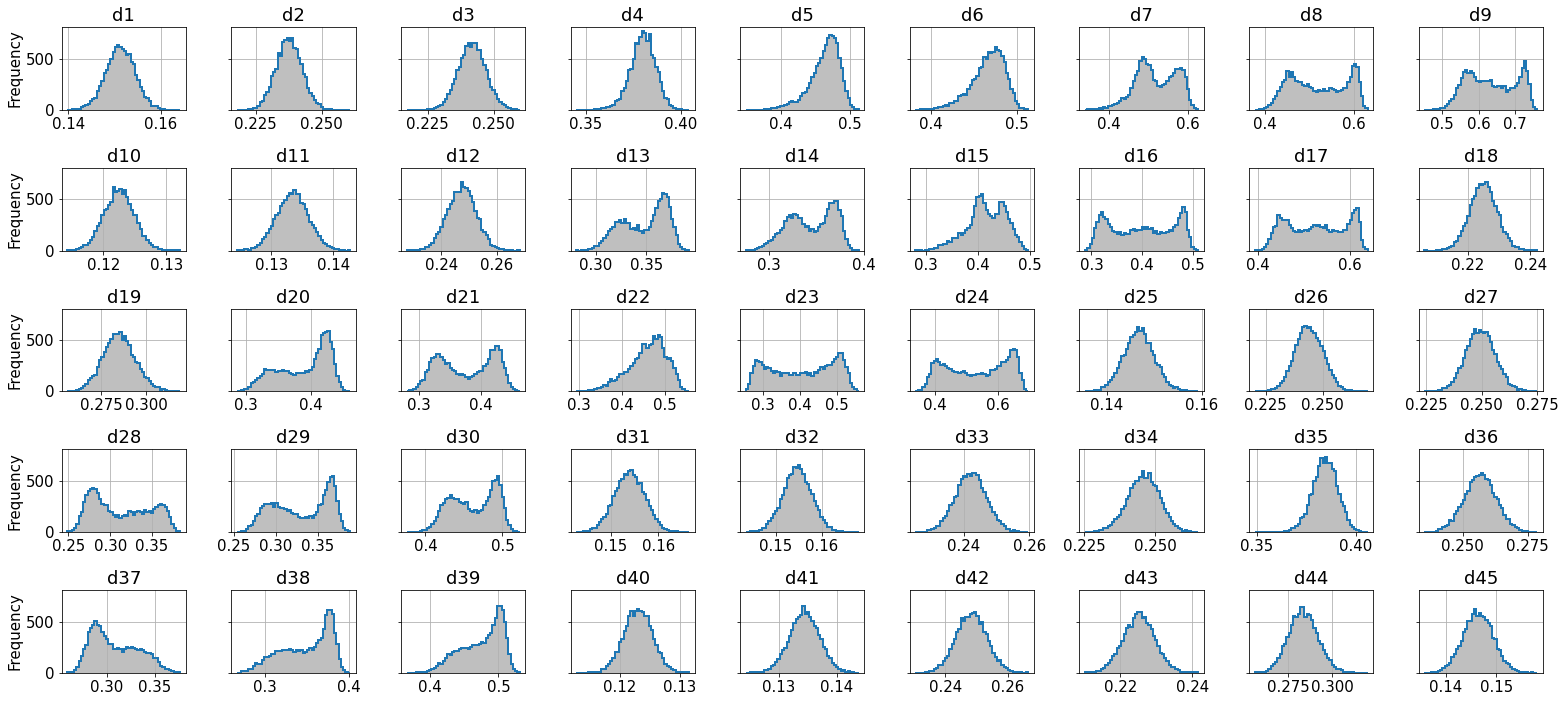

In [13]:
#data = load_dataframe(folder+"COLVAR")
descriptors_names = data.filter(regex='^d[^a-z]').columns.values

fig,axs = plt.subplots(5,9,figsize=(22,10),sharey=True)

for ax,desc in zip(axs.flatten(),descriptors_names):
    newdata[desc].plot.hist(bins=50,alpha=1,ax=ax,legend=False,grid=True,histtype='step',linewidth=2)#,density=True)
    newdata[desc].plot.hist(bins=50,alpha=0.5,ax=ax,legend=False,grid=True,color="grey")#,density=True)
    ax.set_title(desc)

plt.tight_layout()

In [14]:
#-- TRAINING PARAMETERS --#
n_output = 2
n_input = 45
train_parameters = {
              'descriptors': '^d[^a-z]',
              'lag_time':6,
              'standardize_outputs':True,
              'standardize_inputs': True,
              #if reweight the timescale
              "reweighting": True,
              "step": 1 #se prendo tutti i valori fallisce il cholesky decomposition.. issue con pytorch
              }
#--------------------------------------#

In [15]:
lags = np.linspace(0.5,30,30)
time = []
torch.manual_seed(21)
timescale = np.empty(len(lags))
for i,lag in enumerate(lags):
    train_parameters["lag_time"] = lag
    #print("lag time ", lag)
    model,logweight,X,names = training(newdata,sim_parameters["beta"],train_parameters)

    #-- move the model back to cpu for convenience --# 
    model.to('cpu')

    timescale[i] = model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1]

[0.08947462 0.01381487 0.01316367 0.00954767 0.01064396 0.01582024
 0.01306813 0.00884972 0.00926005 0.00472235 0.00190998 0.01407313
 0.00266779 0.00433902 0.00691772 0.00242741 0.00676035 0.01284713
 0.0014945  0.01107255 0.00517611 0.01481703 0.00323402 0.0344835
 0.00287107 0.00605057 0.00321431 0.00806352 0.0047086  0.0009781 ]
[ 0.5         1.51724138  2.53448276  3.55172414  4.56896552  5.5862069
  6.60344828  7.62068966  8.63793103  9.65517241 10.67241379 11.68965517
 12.70689655 13.72413793 14.74137931 15.75862069 16.77586207 17.79310345
 18.81034483 19.82758621 20.84482759 21.86206897 22.87931034 23.89655172
 24.9137931  25.93103448 26.94827586 27.96551724 28.98275862 30.        ]


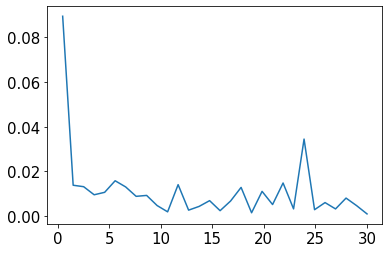

In [16]:
plt.plot(lags,timescale)
print(timescale)
print(lags)

## DeepTICA Analysis and Export

In [32]:
torch.manual_seed(21)
train_parameters["lag_time"] = 24
model,logweight,X,names = training(newdata,sim_parameters["beta"],train_parameters,tprime=None)

#-- move the model back to cpu for convenience --# 
model.to('cpu')

#-- print some useful results --#
print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])

model.set_params({"feature_names": names})
print( model.plumed_input().splitlines()[:2] )

timescales:  [9.104158  8.637482  8.386082  8.264496  8.163393  7.825723  7.720765
 7.5508804 7.3162236 6.942711  6.8695745 6.782194  6.643593  6.3076563
 6.244928  5.939273  5.4888425 5.384499  5.006469  4.4535336 3.7480588
 3.503963        nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan]
eigenvalues:  [ 0.07163597  0.06212619  0.05716093  0.05480421  0.05286814  0.04656952
  0.0446679   0.04165069  0.03761392  0.03152852  0.03038925  0.02905172
  0.02698422  0.02226143  0.02142668  0.01758166  0.01261957  0.01159433
  0.00828095  0.00456663  0.00165606  0.00106011 -0.00280383 -0.00487711
 -0.00866111 -0.01023022 -0.01421037 -0.01660089 -0.01915864 -0.02221305
 -0.02377805 -0.02858696 -0.02974845 -0.03303934 -0.03444146 -0.0357159
 -0.03903865 -0.04755061 -0.05096244 -0.053286   -0.05929398 -0.0608514
 -0.063

In [33]:
X = newdata.filter(regex=train_parameters["descriptors"]).values
newdata["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
newdata["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]
newdata["cv3"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[2]
newdata["cv4"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[3]
data_complete["cv1"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[0]
data_complete["cv2"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[1]
data_complete["cv3"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[2]
data_complete["cv4"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[3]

<AxesSubplot:ylabel='Frequency'>

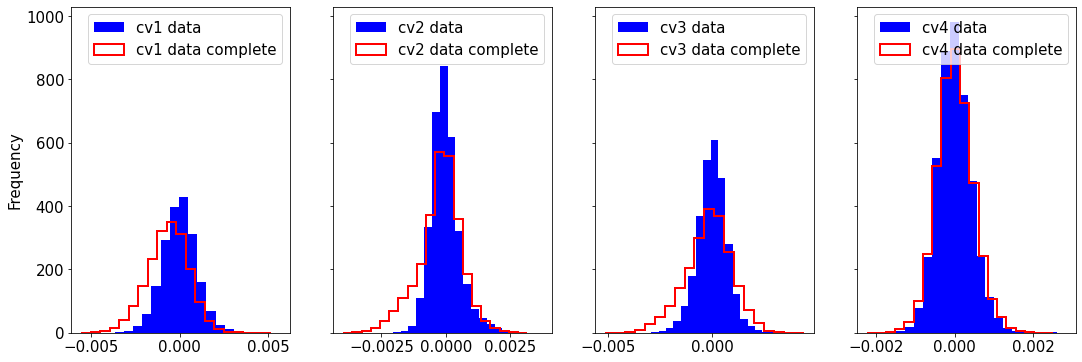

In [34]:
fig,axs = plt.subplots(1,4,figsize=(18,6),sharey=True)
newdata.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="b",label="cv1 data")
newdata.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="b",label="cv2 data")
newdata.plot.hist(y="cv3",bins=20,ax=axs[2],density=True,color="b",label="cv3 data")
newdata.plot.hist(y="cv4",bins=20,ax=axs[3],density=True,color="b",label="cv4 data")
data_complete.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,histtype='step',color="r",linewidth=2,label="cv1 data complete")
data_complete.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,histtype='step',color="r",linewidth=2,label="cv2 data complete")
data_complete.plot.hist(y="cv3",bins=20,ax=axs[2],density=True,histtype='step',color="r",linewidth=2,label="cv3 data complete")
data_complete.plot.hist(y="cv4",bins=20,ax=axs[3],density=True,histtype='step',color="r",linewidth=2,label="cv4 data complete")

We can also plot the correlation (*Pearson* correlation ,which simply means normed correlation) of the Deep-TICA cvs with the descriptors

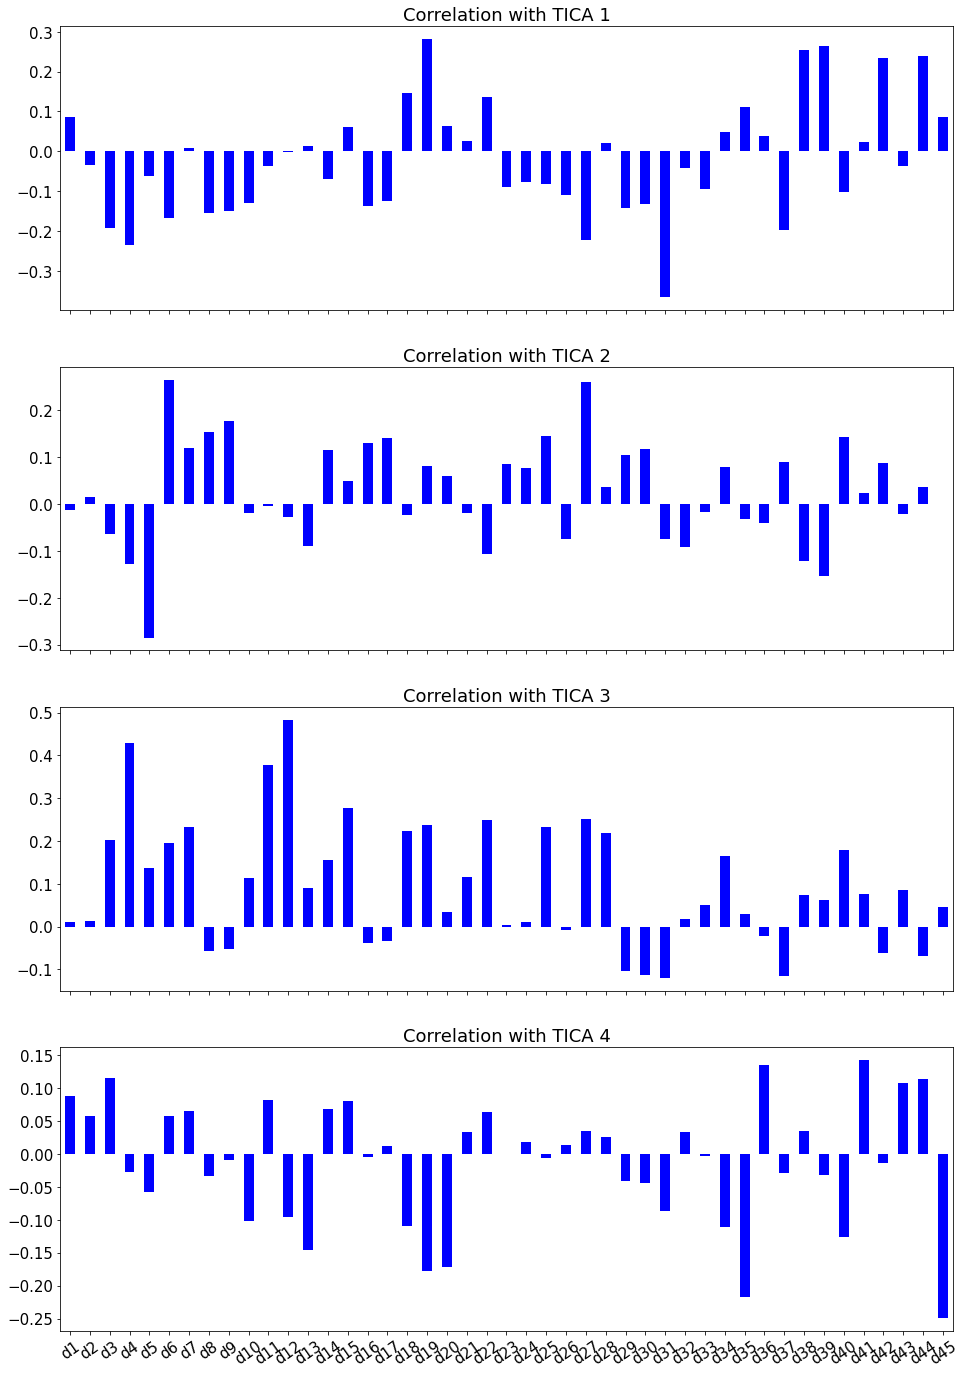

In [35]:
fig,axs = plt.subplots(4,1,figsize=(16,24),sharex=True)
for k,cv in enumerate(["cv1","cv2","cv3","cv4"]):
    cols = [cv]
    cols.extend(newdata.filter(regex=train_parameters["descriptors"]).columns)
    corr = newdata[cols].corr(method='pearson')
    corr[cv].drop(cv).plot(kind='bar', ax=axs[k], rot=35, color="b",label=r"$C(tica|desc)$")
    axs[k].set_title('Correlation with TICA '+str(k+1))
plt.show()

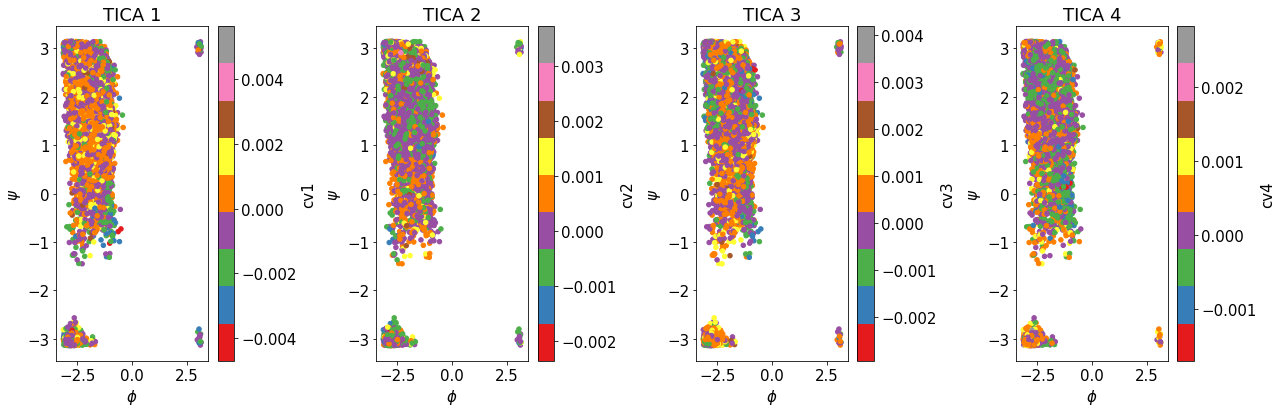

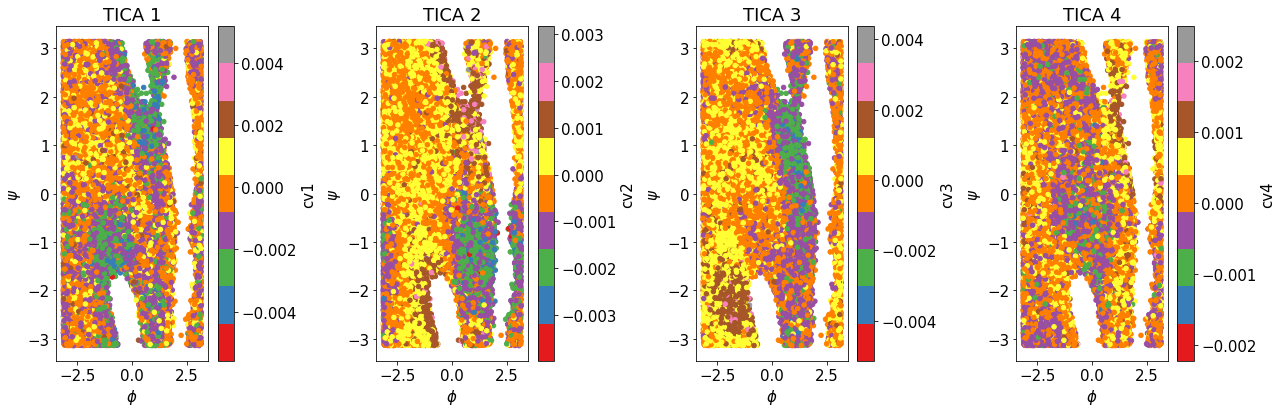

In [36]:
fig,axs = plt.subplots(1,4,figsize=(18,6))
for k,ax in enumerate(axs):
    newdata.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="Set1",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('TICA '+str(k+1))
plt.tight_layout()
fig,axs = plt.subplots(1,4,figsize=(18,6))
for k,ax in enumerate(axs):
    data_complete.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="Set1",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('TICA '+str(k+1))
plt.tight_layout()

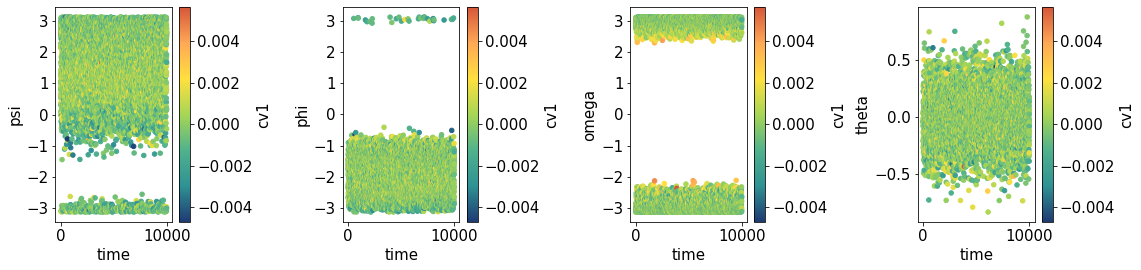

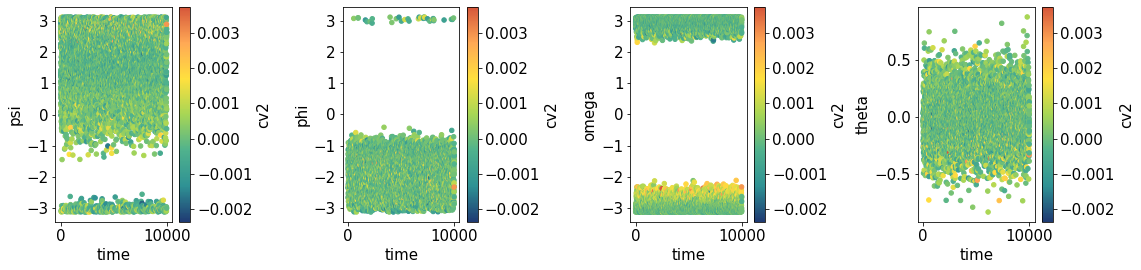

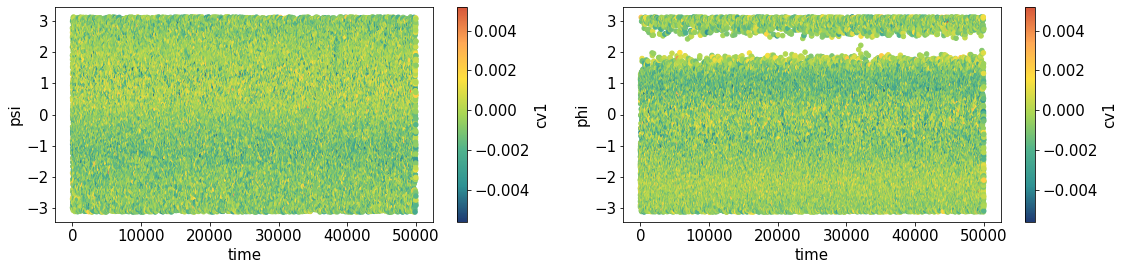

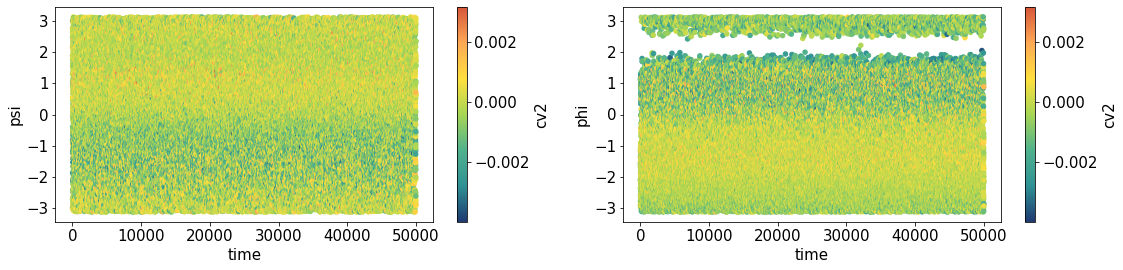

In [37]:
names = ["psi","phi","omega","theta"]
fig,axs = plt.subplots(1,4,figsize=(16,4))
for i,ax in enumerate(axs):
    newdata.plot.scatter(y=names[i],x="time",c="cv1",cmap="fessa",ax=ax)
plt.tight_layout()
fig,axs = plt.subplots(1,4,figsize=(16,4))
for i,ax in enumerate(axs):
    newdata.plot.scatter(y=names[i],x="time",c="cv2",cmap="fessa",ax=ax)
plt.tight_layout()

fig,axs = plt.subplots(1,2,figsize=(16,4))
for i,ax in enumerate(axs):
    data_complete.plot.scatter(y=names[i],x="time",c="cv1",cmap="fessa",ax=ax)
plt.tight_layout()
fig,axs = plt.subplots(1,2,figsize=(16,4))
for i,ax in enumerate(axs):
    data_complete.plot.scatter(y=names[i],x="time",c="cv2",cmap="fessa",ax=ax)
plt.tight_layout()

### FES estimate from new cvs   

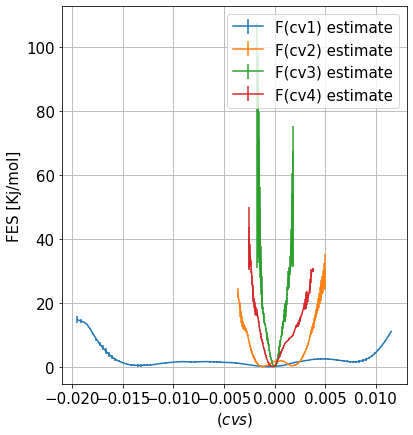

In [100]:
#-- estimation of Free Energy Surface --#
s = newdata.filter(regex="^cv").to_numpy()

fig, ax = plt.subplots(figsize=(6,6))
for i in range(4):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight),
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=sim_parameters["blocks"],
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=True, plot_max_fes=sim_parameters["plot_max_fes"], ax = ax)
ax.legend(["F(cv1) estimate","F(cv2) estimate","F(cv3) estimate","F(cv4) estimate"])   
ax.grid()
plt.tight_layout()
ax.set_xlabel(r"$(cvs)$")
ax.set_ylabel("FES [Kj/mol]")

plt.show()

### Orthogonality  
We said that the **ICs** must satisfy two conditions. The first one is that they are uncorrelated, which means that $\int d \vec x \psi_1(\vec x) \psi_2(\vec x) e^{-\beta U(\vec x)} = 0$.  
But their scalar product on the data will lead to a slightly different result, in this case approximately $0$, but not perfectly $0$

In [101]:
Boltzmann_product(model,model,X,j=0,k=1,logweight=logweight)

0.0013983025903450078